In [10]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
display(data.head())

#Perform exploratory data analysis to find a pattern or find and filter the criteria which are most responsible for attrition.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
display(data.describe())
missing_values = data.isnull().sum()

#print(missing_values)
#no missing values
data.dtypes
data.nunique()
# Percentage of 'Attrition' unique value 
data.Attrition.value_counts()/len(data)*100
# Changing feature 'Attrition as a 'target with 1 as 'Yes'
data['Attrition'] = np.where(data['Attrition']=='Yes',1,0)
data.drop(columns=['EmployeeNumber'], inplace=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Attrition
No     1233
Yes     237
Name: count, dtype: int64


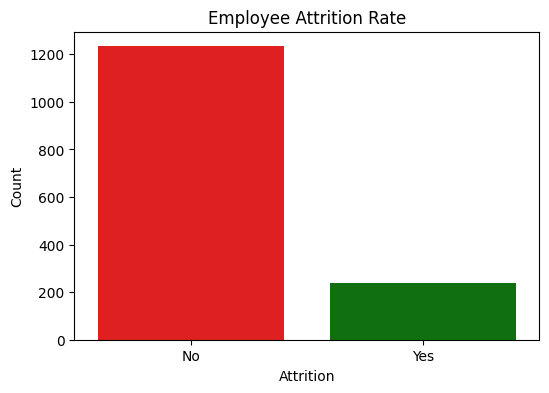

In [25]:
# Attrition Rate Visualization
attrition_counts = data['Attrition'].value_counts()
print(attrition_counts) 

plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, hue=attrition_counts.index, palette=['red', 'green'])

plt.title('Employee Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

pal_2 = sns.color_palette("GnBu",n_colors=2)

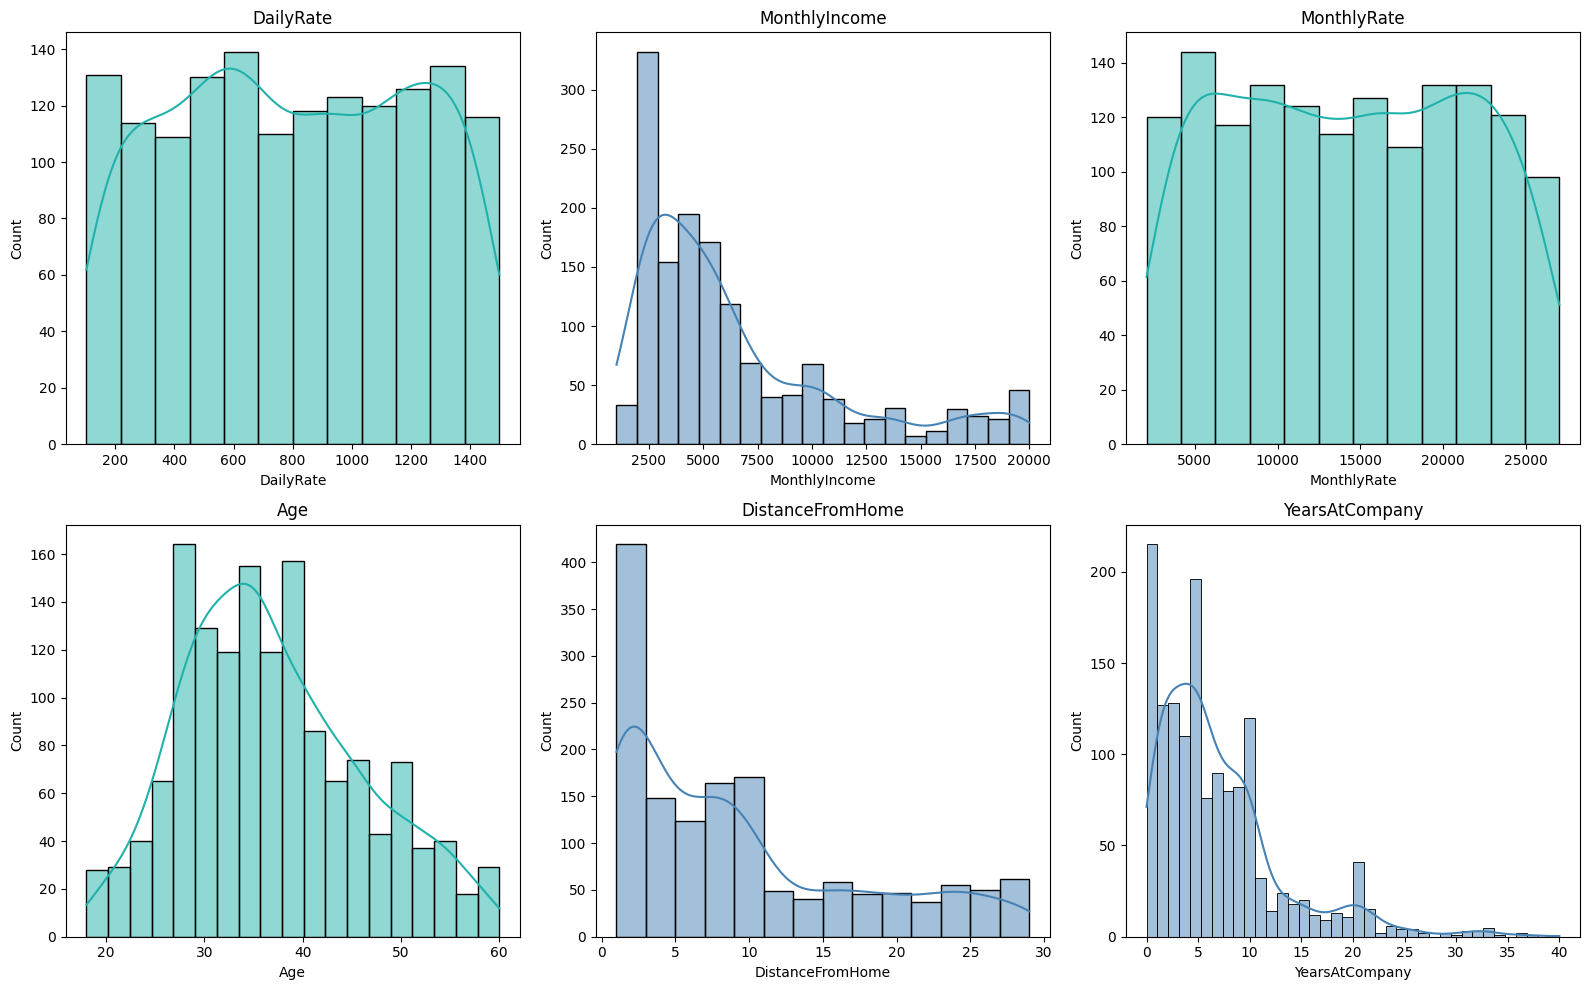

In [18]:
#Univariate numerical feature analysis

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.histplot(data['DailyRate'], kde=True, ax=axes[0,0], color='lightseagreen')
axes[0,0].set_title('DailyRate')

sns.histplot(data['MonthlyIncome'], kde=True, ax=axes[0,1], color='steelblue')
axes[0,1].set_title('MonthlyIncome')

sns.histplot(data['MonthlyRate'], kde=True, ax=axes[0,2], color='lightseagreen')
axes[0,2].set_title('MonthlyRate')

sns.histplot(data['Age'], kde=True, ax=axes[1,0], color='lightseagreen')
axes[1,0].set_title('Age')

sns.histplot(data['DistanceFromHome'], kde=True, ax=axes[1,1], color='steelblue')
axes[1,1].set_title('DistanceFromHome')

sns.histplot(data['YearsAtCompany'], kde=True, ax=axes[1,2], color='steelblue')
axes[1,2].set_title('YearsAtCompany')

plt.tight_layout()
plt.show()

#MonthlyIncome, DistanceFromHome, YearsAtCompany features have outlier.


/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


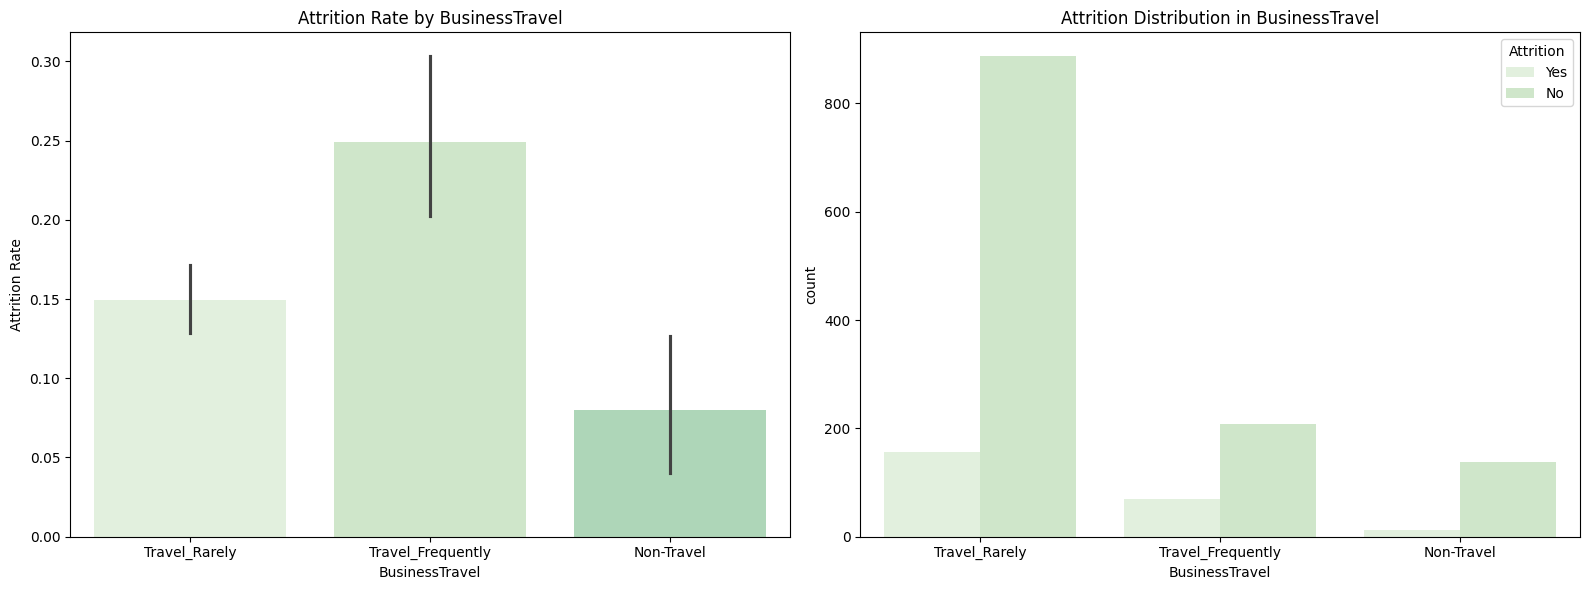

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


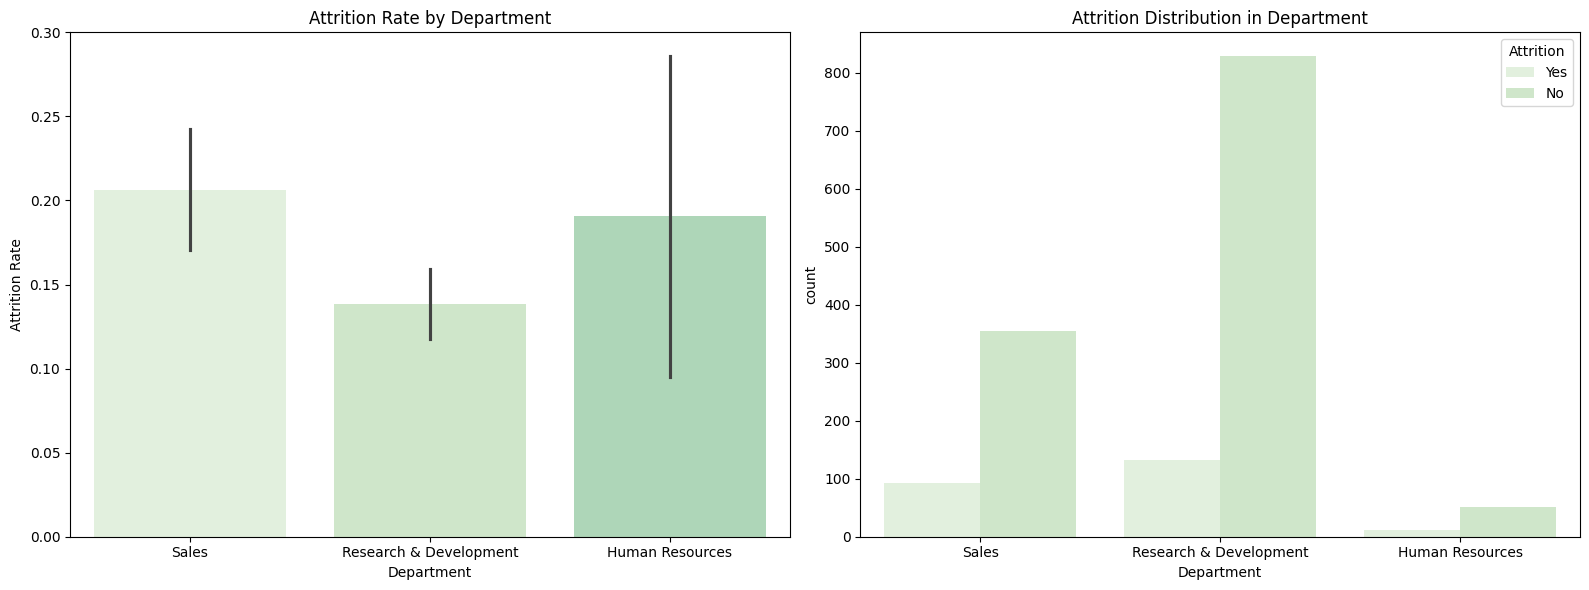

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


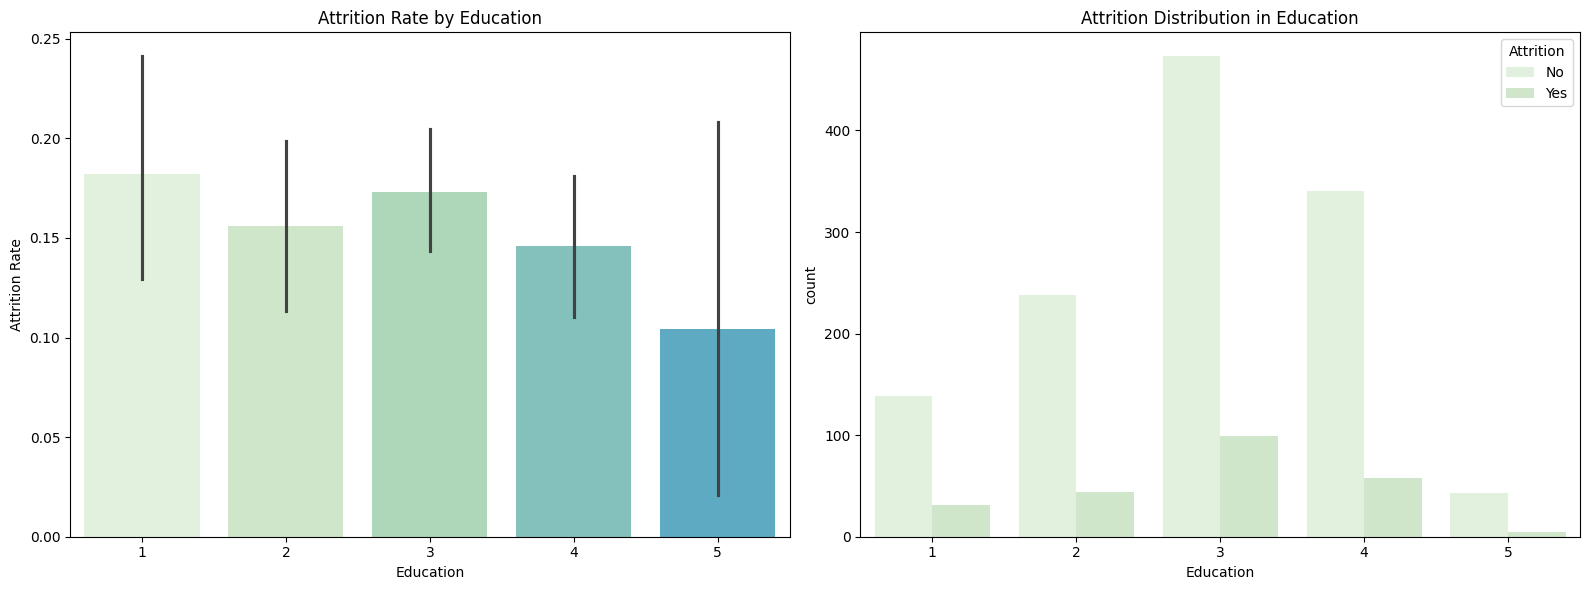

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


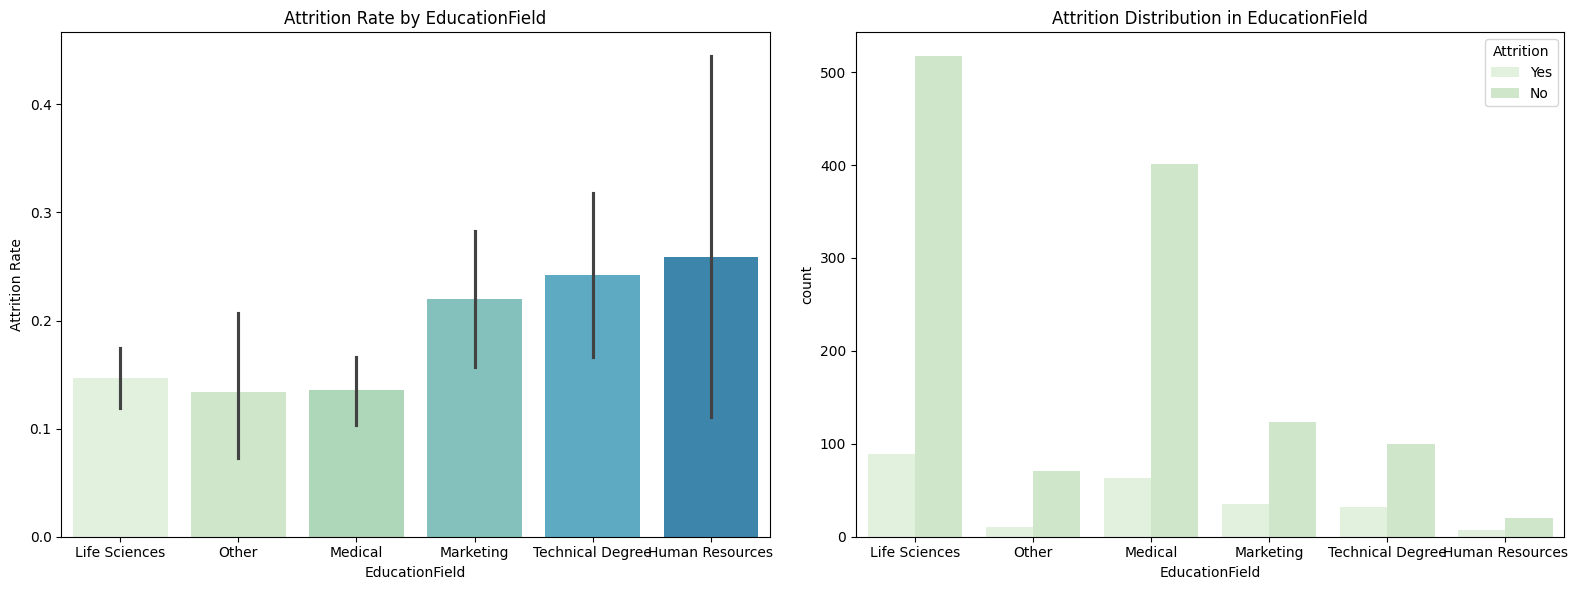

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


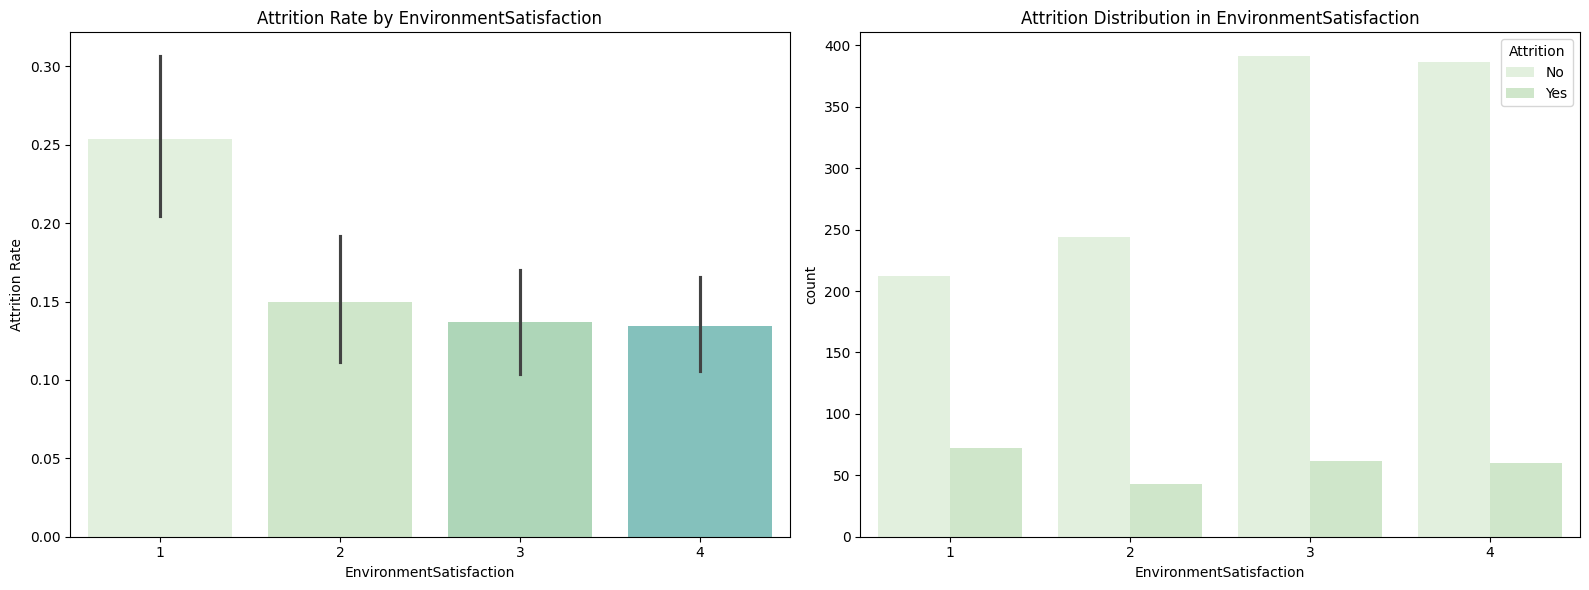

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


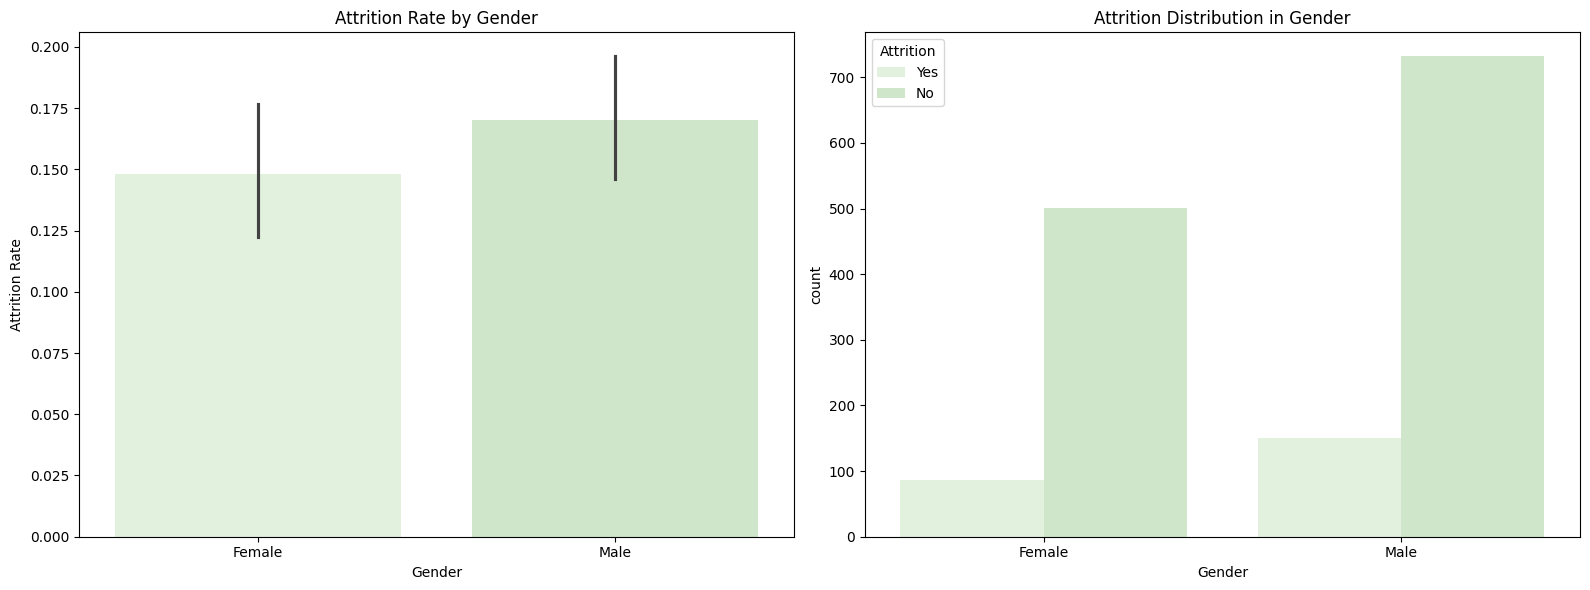

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


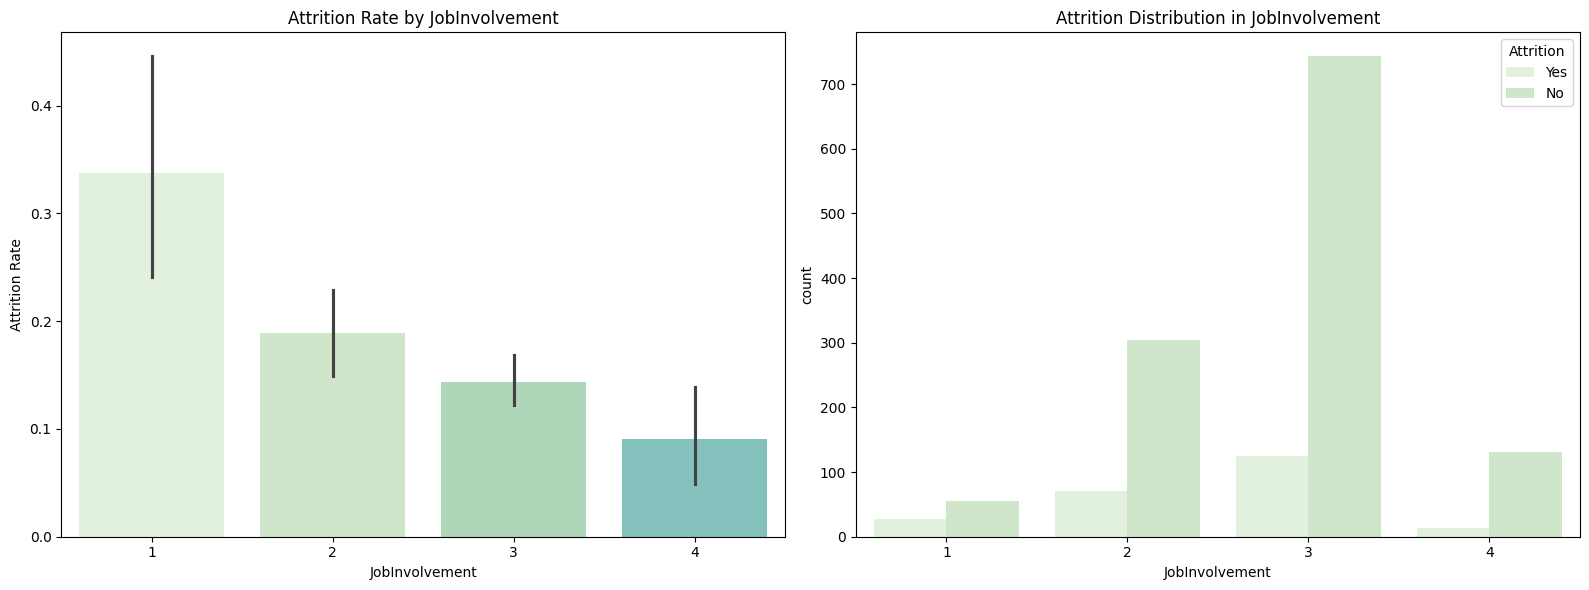

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


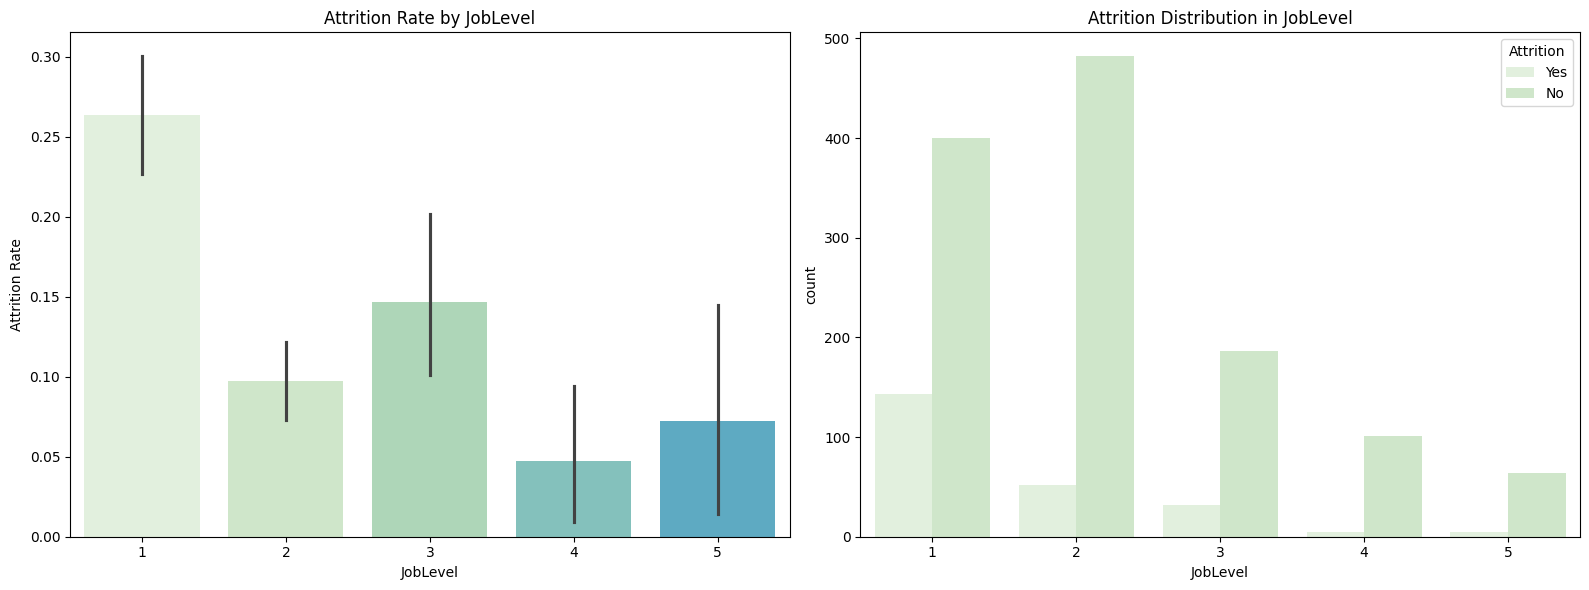

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


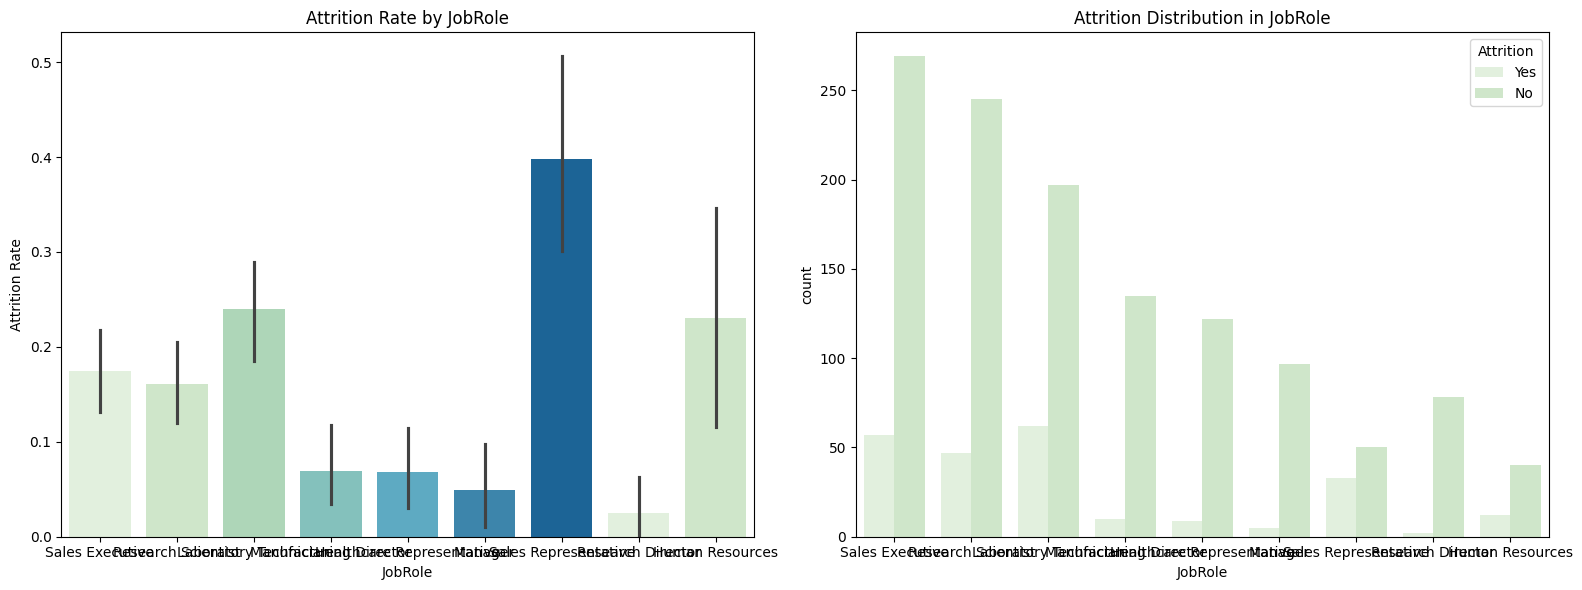

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


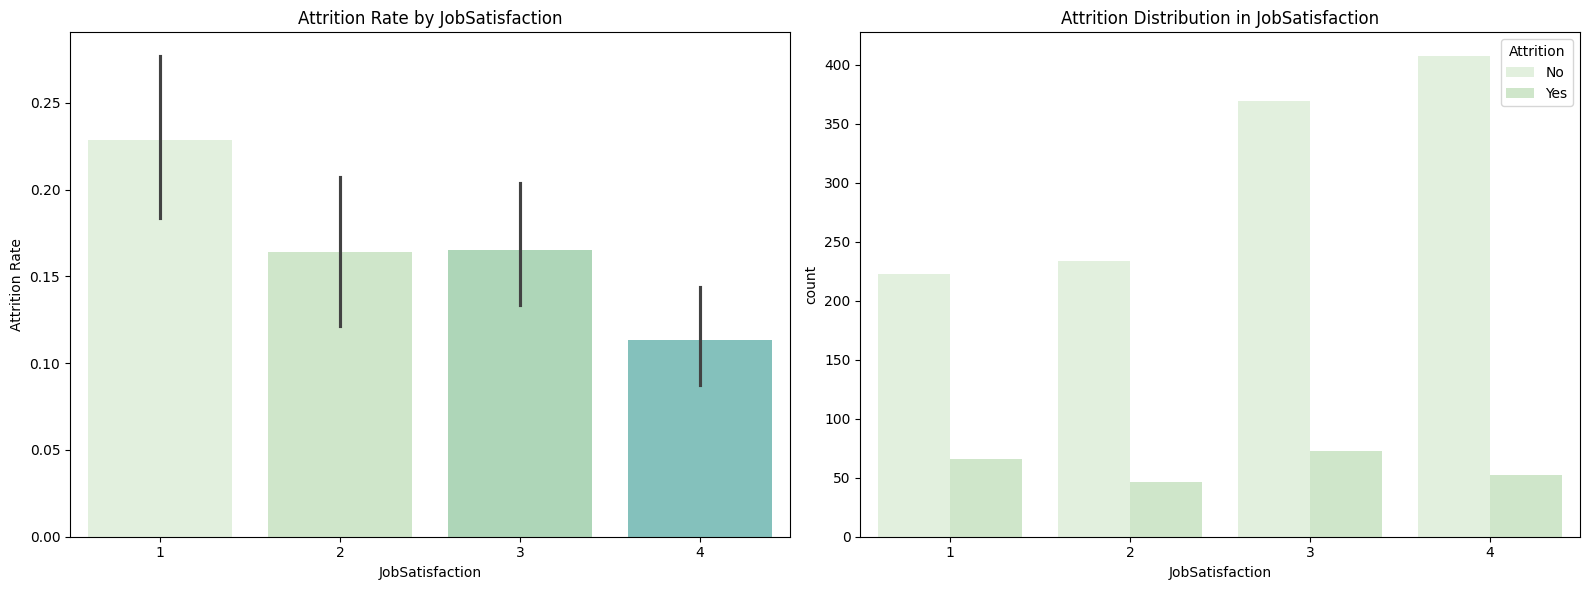

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


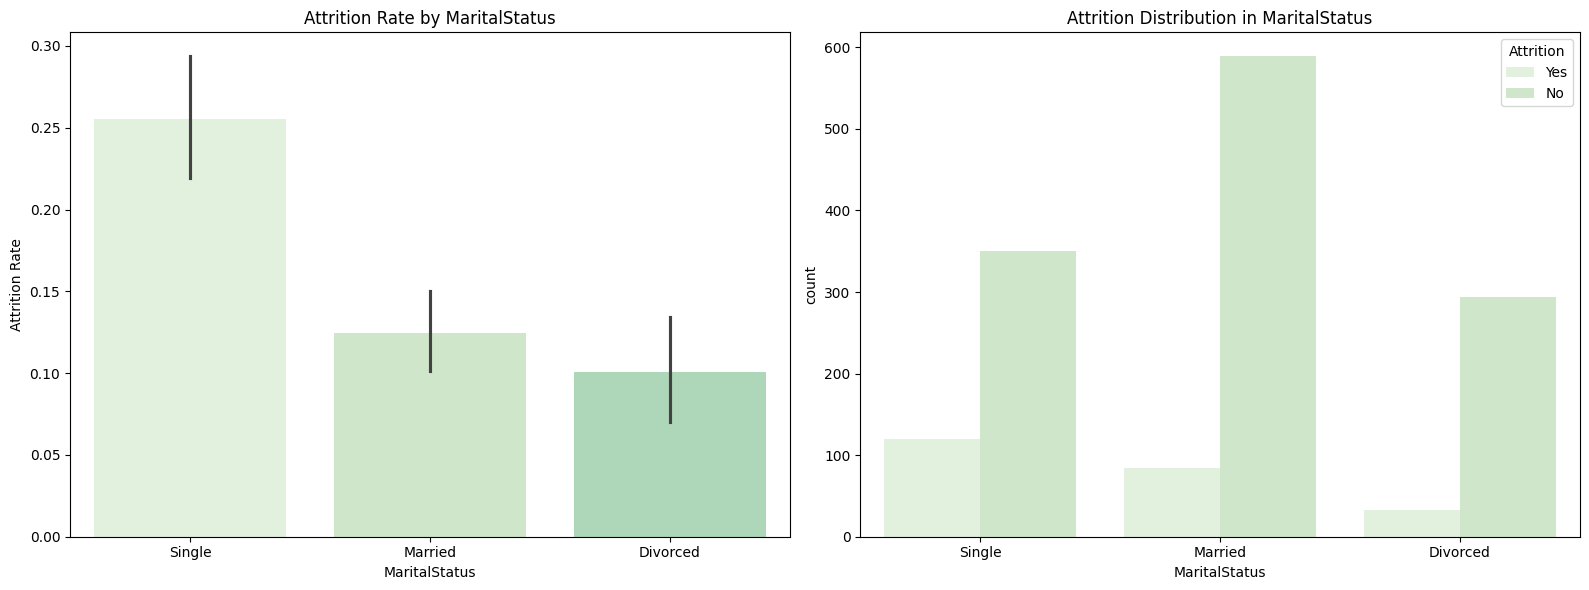

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


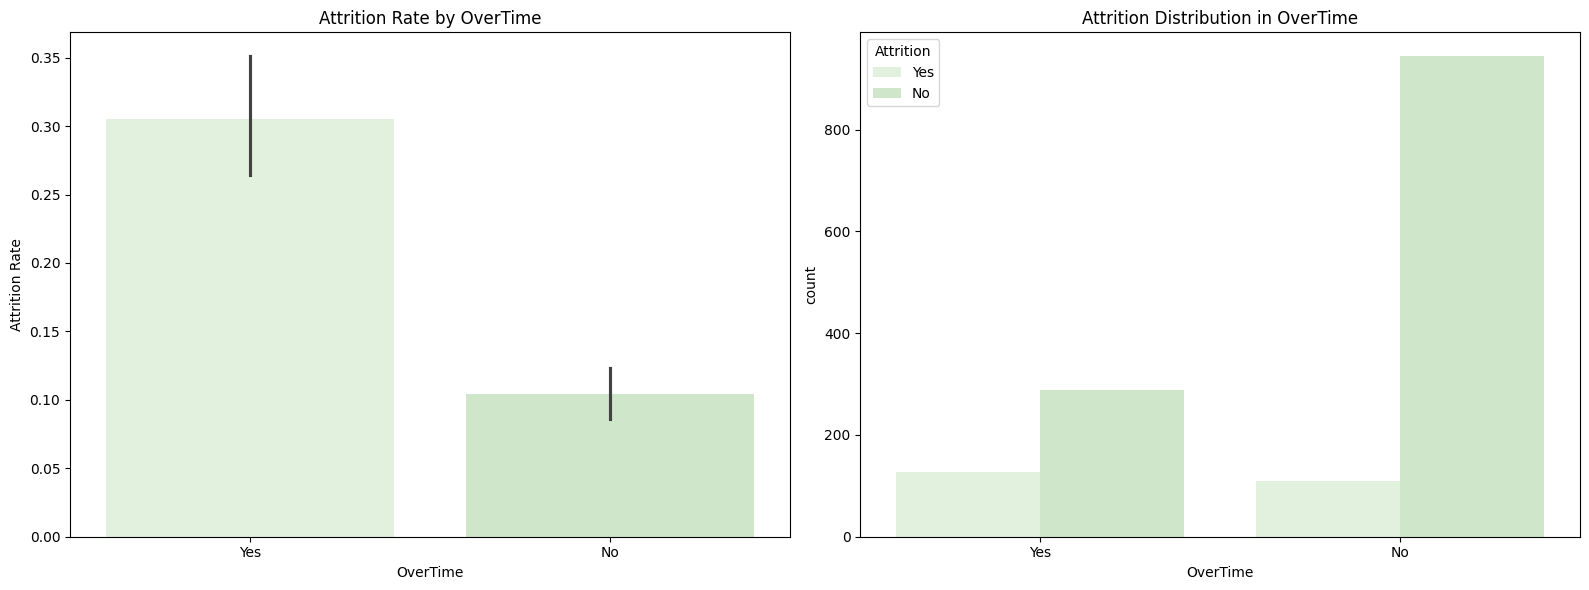

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


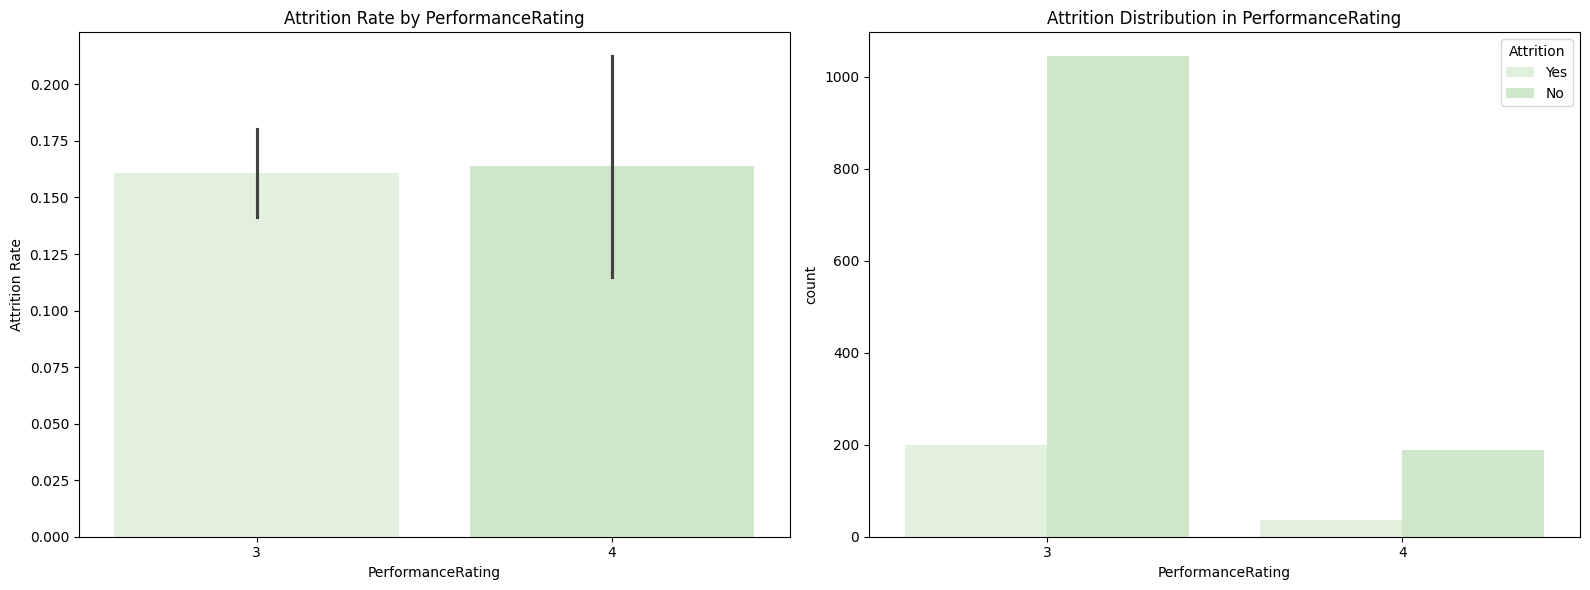

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


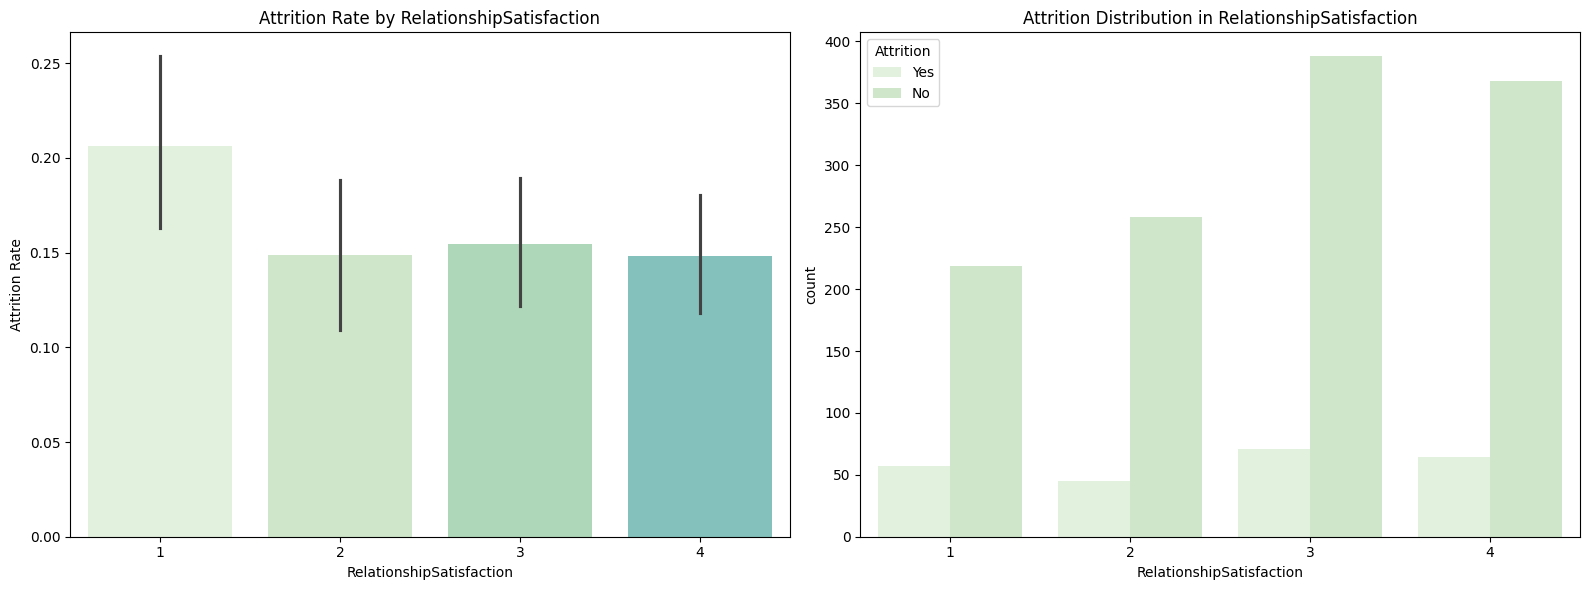

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


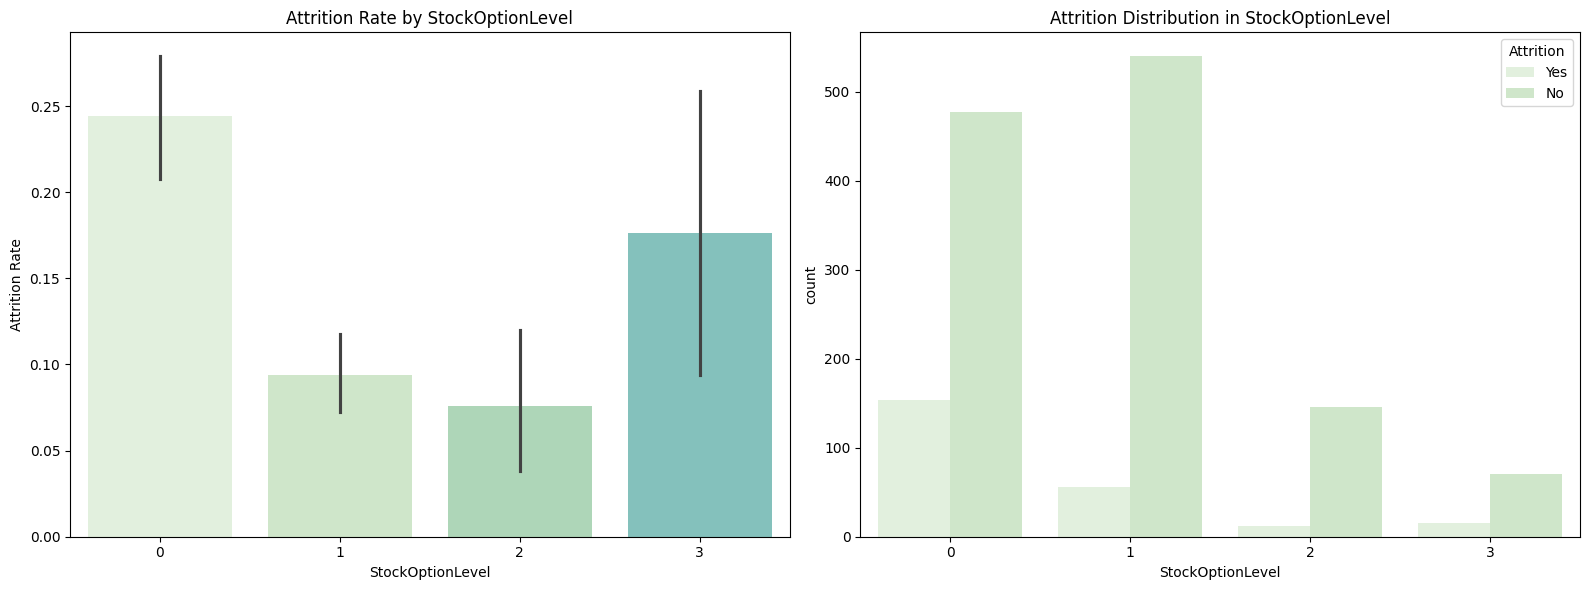

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


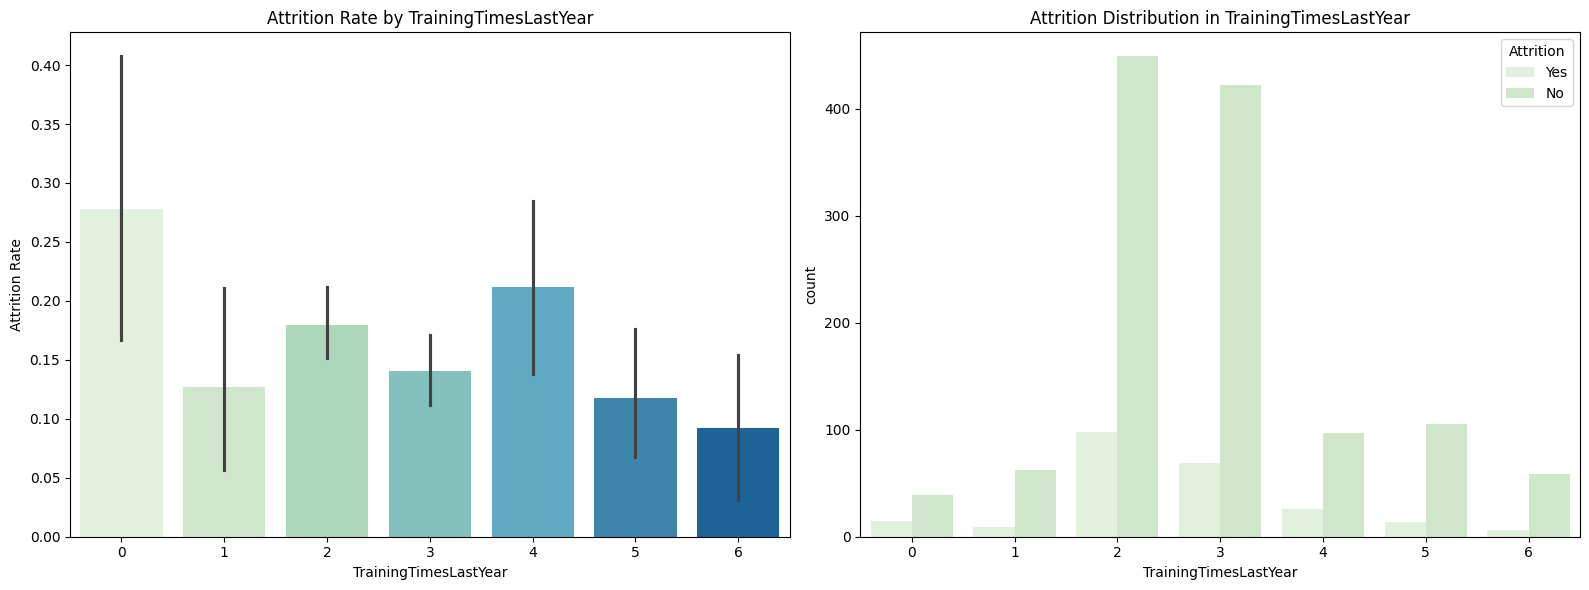

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


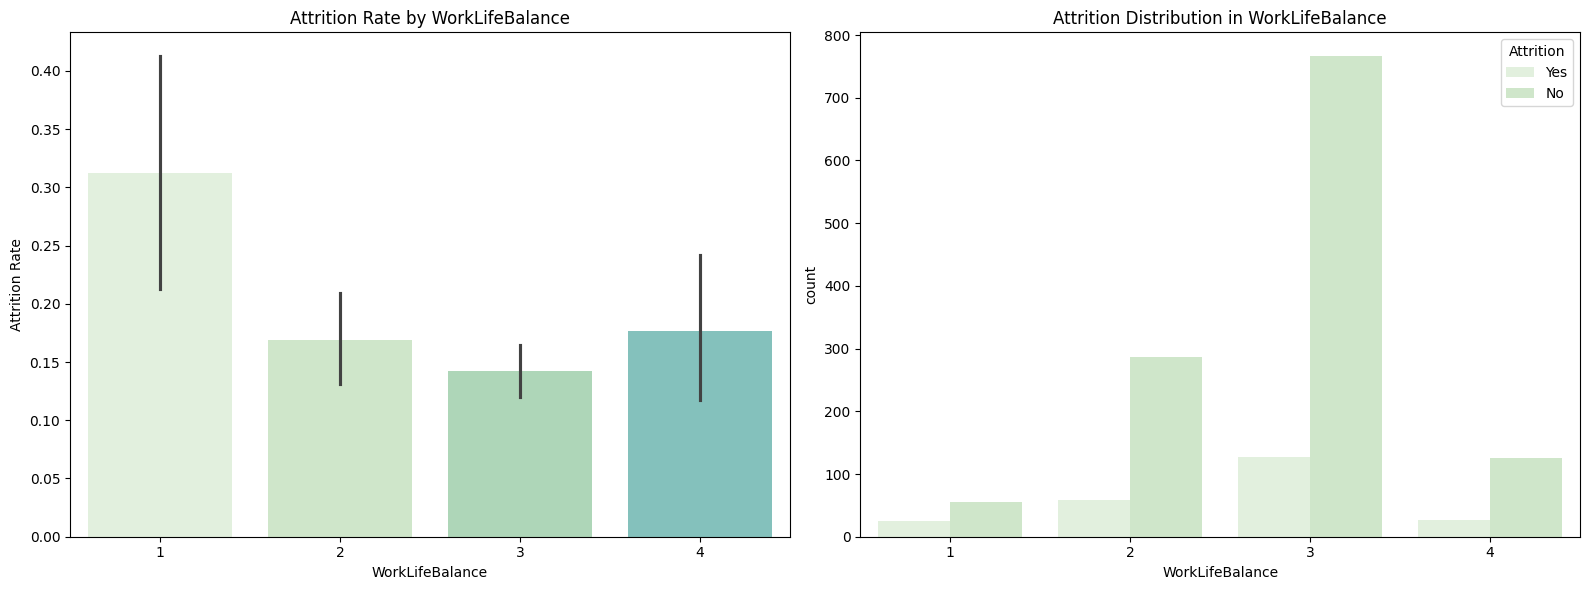

/tmp/ipykernel_1830/2979463854.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:27: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
/tmp/ipykernel_1830/2979463854.py:32: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)


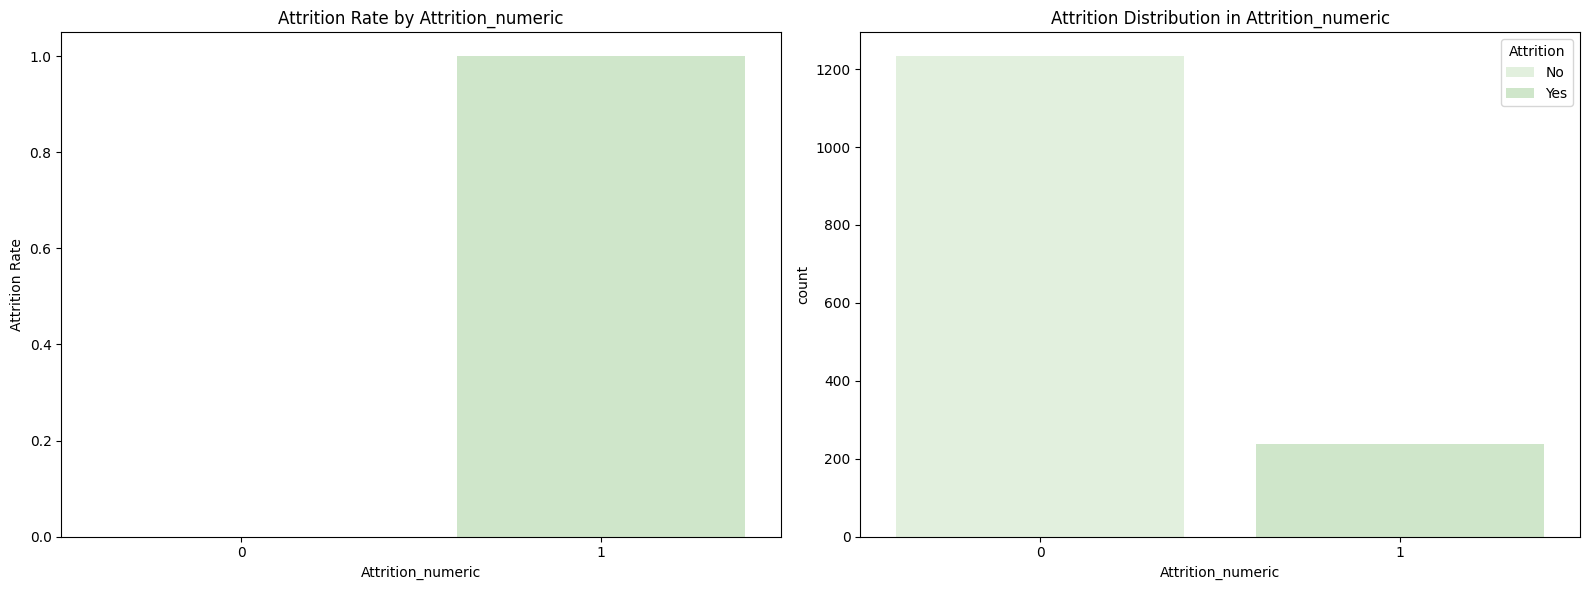

In [27]:
#Bi Variate Categorical Features Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
pal_7 = sns.color_palette("GnBu", n_colors=7)

# Selecting categorical features (excluding Attrition)
cata = []
feat = data.drop(['Attrition'], axis=1)

# Identify categorical features with 2 to 9 unique values
for col in feat.columns:
    unique_vals = data[col].nunique()
    if 1 < unique_vals < 10:
        cata.append(col)

# Plot bivariate categorical analysis
for col in cata:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot for Attrition rate per category
    sns.barplot(x=col, y='Attrition_numeric', data=data, ax=axes[0], palette=pal_7)
    axes[0].set_title(f'Attrition Rate by {col}')
    axes[0].set_ylabel('Attrition Rate')

    # Count plot for category distribution
    sns.countplot(x=col, data=data, hue='Attrition', ax=axes[1], palette=pal_7)
    axes[1].set_title(f'Attrition Distribution in {col}')
    
    plt.tight_layout()
    plt.show()

#Attrition rate for male and female in Gender feature is almost equal.
#Attrition rate for 3 and 4 in PerformanceRating is almost equal.

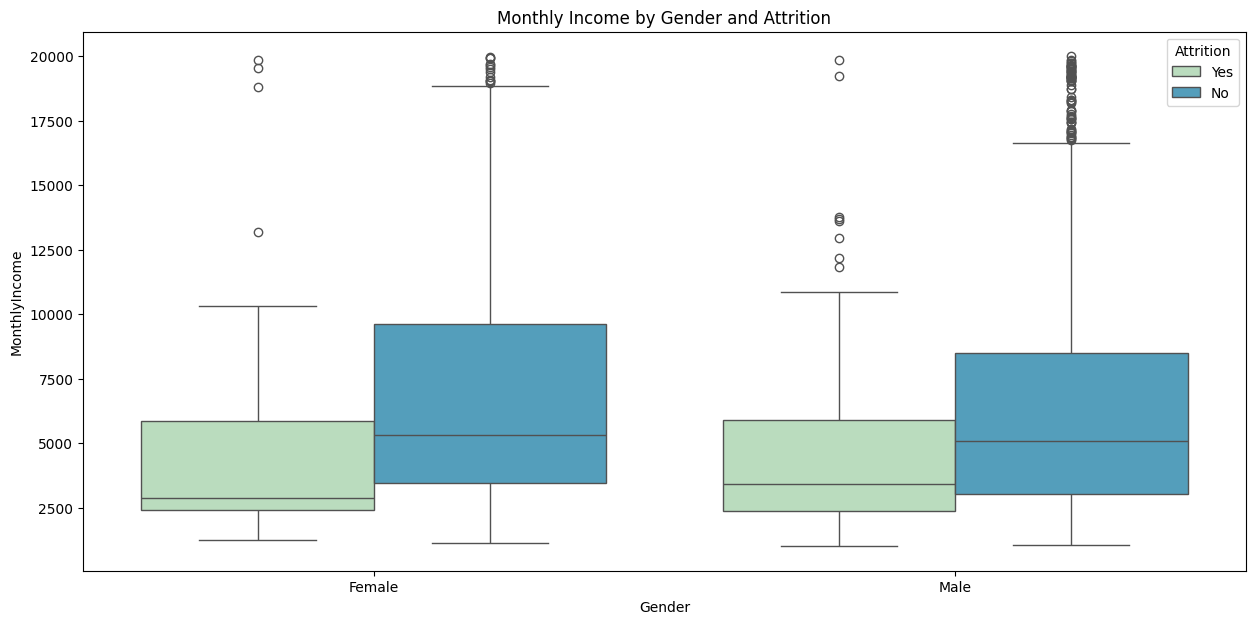

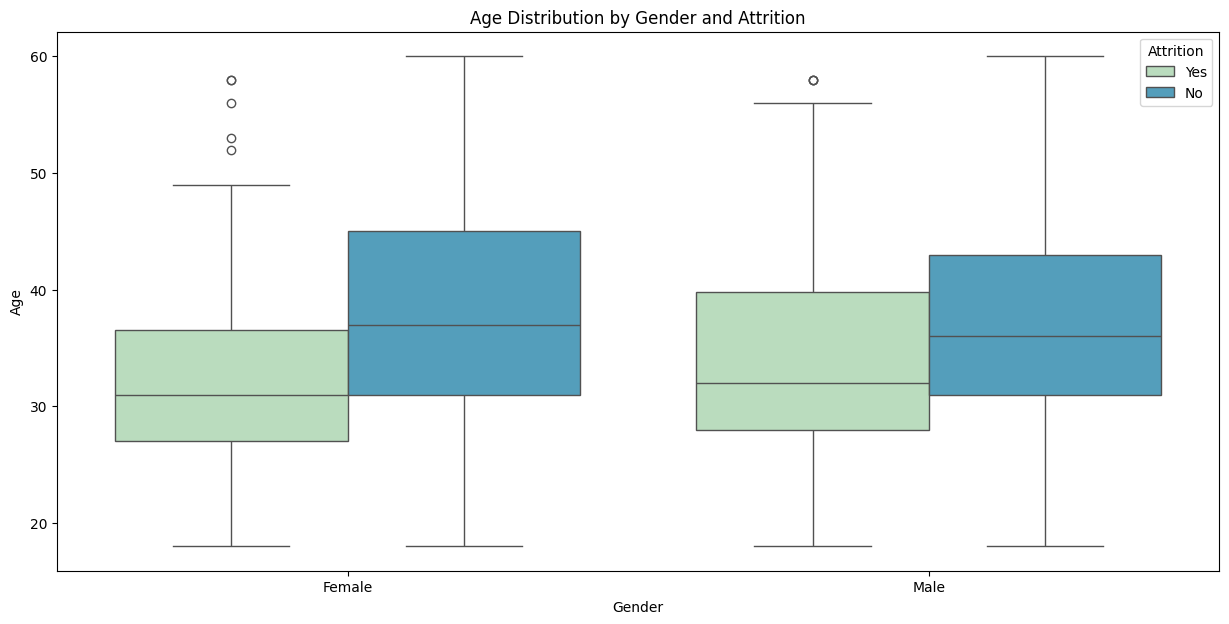

Attrition Rate by Gender:
         Attrition_numeric
Gender                   
Female           0.147959
Male             0.170068

Average Monthly Income by Gender and Attrition:
                   MonthlyIncome
Gender Attrition               
Female No           7019.429142
       Yes          4769.735632
Male   No           6704.964481
       Yes          4797.160000

Median Monthly Income by Gender and Attrition:
                   MonthlyIncome
Gender Attrition               
Female No                5329.0
       Yes               2886.0
Male   No                5075.0
       Yes               3407.5

Average Age by Gender and Attrition:
                         Age
Gender Attrition           
Female No         38.155689
       Yes        32.574713
Male   No         37.154372
       Yes        34.206667


In [31]:

# Convert Attrition to numerical values (Yes → 1, No → 0)
data['Attrition_numeric'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Boxplot for Gender vs Monthly Income (with Attrition hue)
plt.figure(figsize=(15,7))
sns.boxplot(x="Gender", y="MonthlyIncome", data=data, hue='Attrition', palette=pal_2)
plt.title("Monthly Income by Gender and Attrition")
plt.show()

# Boxplot for Gender vs Age (with Attrition hue)
plt.figure(figsize=(15,7))
sns.boxplot(x="Gender", y="Age", data=data, hue='Attrition', palette=pal_2)
plt.title("Age Distribution by Gender and Attrition")
plt.show()

# Compute and display grouped statistics correctly
attrition_mean_by_gender = data.groupby('Gender')['Attrition_numeric'].mean().to_frame()
attrition_income_mean = data.groupby(['Gender', 'Attrition'])['MonthlyIncome'].mean().to_frame()
attrition_income_median = data.groupby(['Gender', 'Attrition'])['MonthlyIncome'].median().to_frame()
attrition_age_mean = data.groupby(['Gender', 'Attrition'])['Age'].mean().to_frame()

# Print results
print("Attrition Rate by Gender:\n", attrition_mean_by_gender)
print("\nAverage Monthly Income by Gender and Attrition:\n", attrition_income_mean)
print("\nMedian Monthly Income by Gender and Attrition:\n", attrition_income_median)
print("\nAverage Age by Gender and Attrition:\n", attrition_age_mean)


#Above analysis confirms that Attrition rate of male is a bit higher than female
#MonthlyIncome rate, Age is almost equal for both Gender.
#Therefore, we can conclude that Gender does not have much influence for Employee Attrition.**

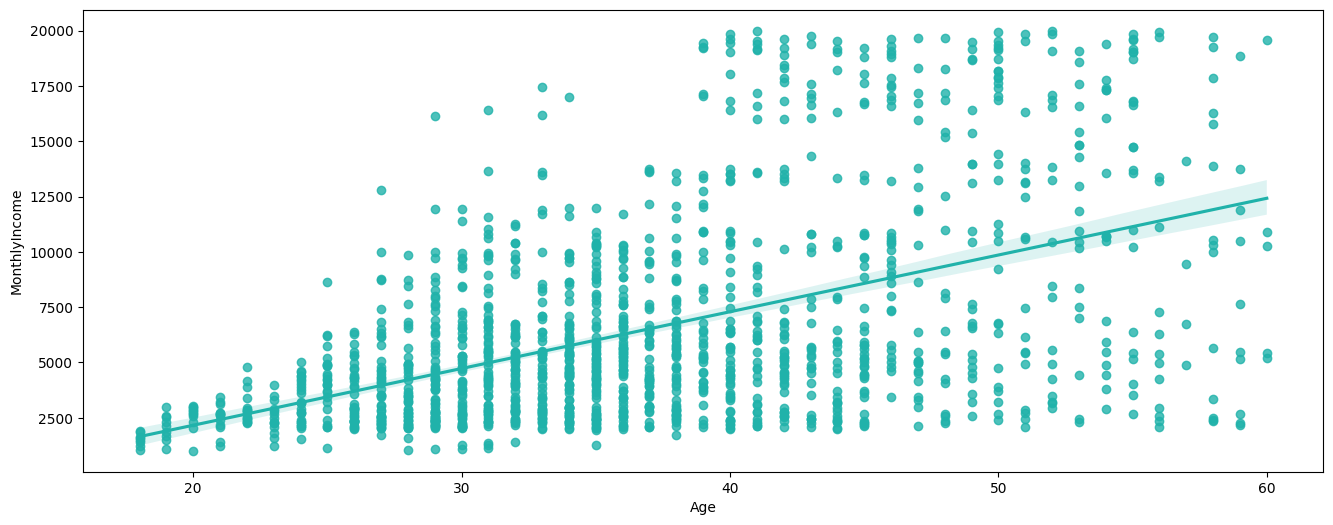

In [33]:
#Plotting Age vs monthly income
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = data,color='lightseagreen')
plt.show()

#There is a linear relation between Age and Monthly income


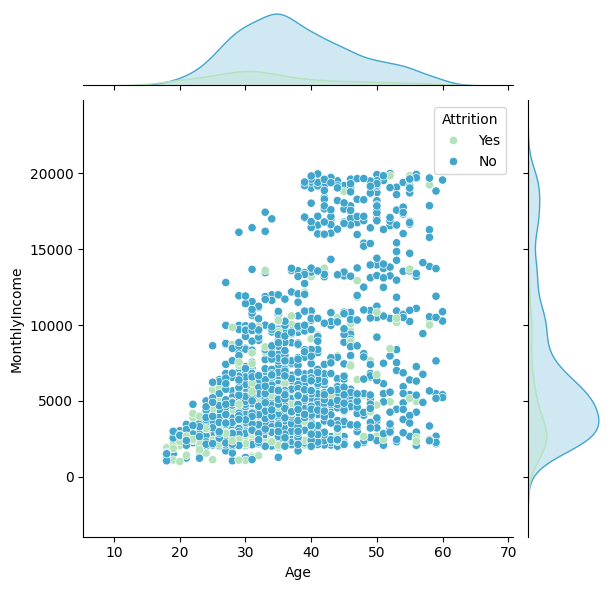

In [35]:
# plt.figure(figsize = (16,6))
sns.jointplot(x='Age',y='MonthlyIncome',data=data,hue='Attrition',palette=pal_2)
plt.show()

In [36]:
data.groupby(['Attrition'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


In [37]:
#Attrition rate is higher for those employees who are having lower income as well younger in age.

<Axes: xlabel='Department', ylabel='DistanceFromHome'>

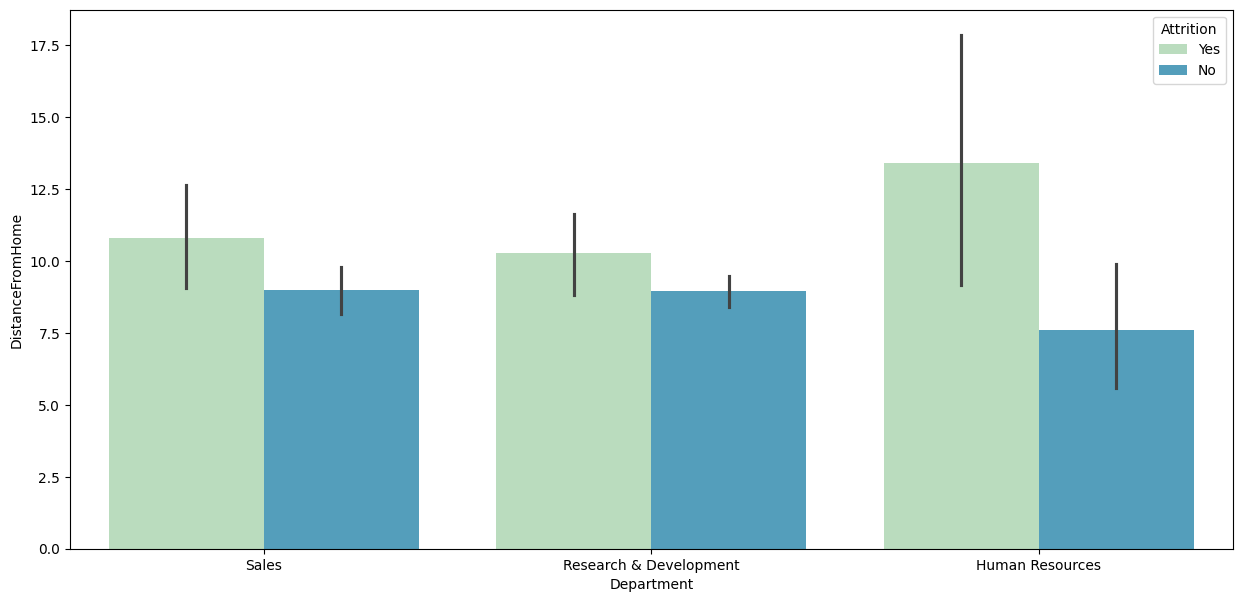

In [39]:
plt.figure(figsize=(15,7))
sns.barplot(x='Department',y='DistanceFromHome',data=data,hue='Attrition',palette=pal_2)
#Employee those are leaving far away from the compnay, they have more chance to leave the company.

<Axes: xlabel='EducationField', ylabel='DailyRate'>

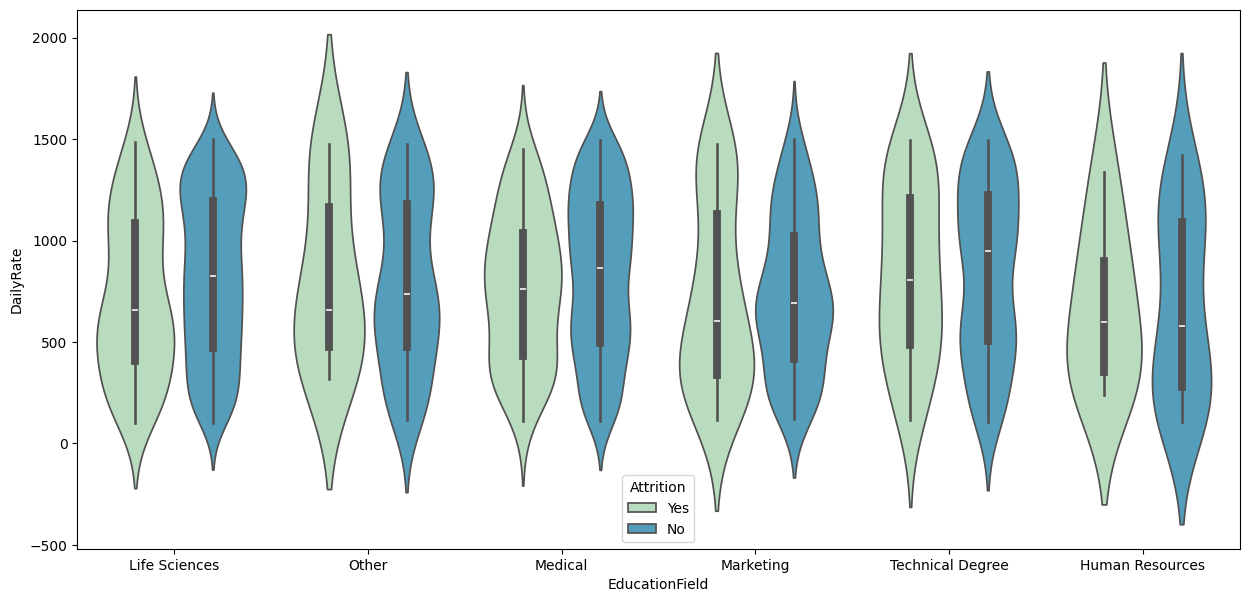

In [40]:
plt.figure(figsize=(15,7))
sns.violinplot( x="EducationField", y='DailyRate',data=data,hue='Attrition',palette=pal_2)

In [43]:
attrition_by_education = data.groupby('EducationField')['Attrition_numeric'].mean().to_frame()
print(attrition_by_education)

                  Attrition_numeric
EducationField                     
Human Resources            0.259259
Life Sciences              0.146865
Marketing                  0.220126
Medical                    0.135776
Other                      0.134146
Technical Degree           0.242424


In [44]:
attrition_by_education_rate = data.groupby(['EducationField','Attrition'])['DailyRate'].mean().to_frame()
print(attrition_by_education_rate)

                             DailyRate
EducationField   Attrition            
Human Resources  No         677.550000
                 Yes        668.714286
Life Sciences    No         818.789168
                 Yes        720.988764
Marketing        No         731.064516
                 Yes        716.400000
Medical          No         832.002494
                 Yes        764.222222
Other            No         792.647887
                 Yes        817.818182
Technical Degree No         843.900000
                 Yes        836.593750


In [ ]:
#Above analysis confirms that employees whose are in Human Resource and Technical Degree EducationField, have high chance to leave the comapany and emplyoees in Technical Degree background are leaving from company with highly DailyRate.